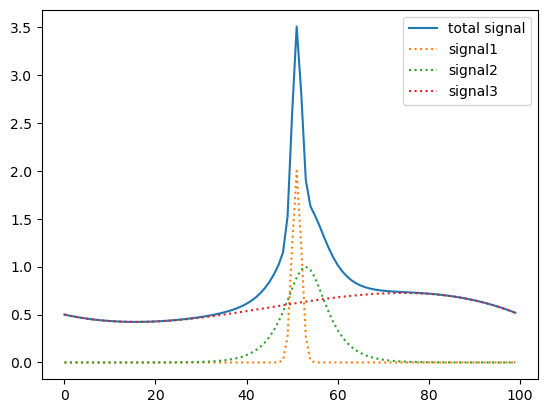

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from IPython.display import HTML
%matplotlib inline
t = np.arange(100)
signal1 = 2*np.exp(-(t-51)**2/2)
signal2 = 1/np.cosh((t-53)/4)
signal3 = 0.5 + 3e-6*(t-35)*(100-t)*t

signal = signal1+signal2+signal3  # total signal

plt.figure()
plt.plot(t, signal,  label='total signal')
plt.plot(t, signal1, ':', label='signal1')
plt.plot(t, signal2, ':', label='signal2')
plt.plot(t, signal3, ':', label='signal3')
#plt.ylim(bottom=0)
plt.legend();

In [2]:
%matplotlib inline
import peaklets as pk
Nt = len(signal)
scales, pklets = pk.pk_parabola2(Nt)
%time animation, transform, filters = pk.pqpt_movie(signal, pklets, scales)

CPU times: user 22.7 s, sys: 715 ms, total: 23.4 s
Wall time: 23.7 s


In [3]:
%time animation.save('movie1.mp4', fps=60)

CPU times: user 38min 28s, sys: 1min 1s, total: 39min 29s
Wall time: 40min 1s


In [4]:
from IPython.display import Video
Video('movie1.mp4')

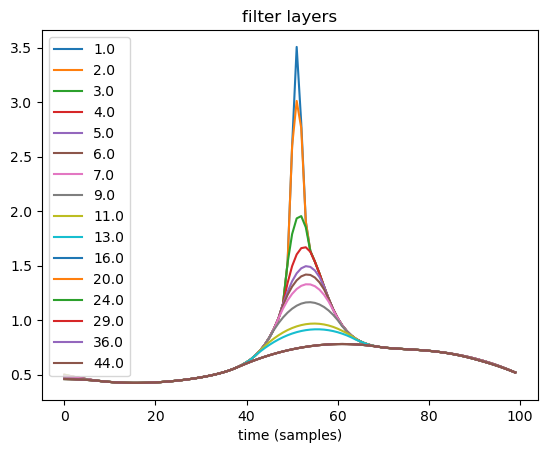

In [5]:
# Plot the filter layers.
Nsc = len(scales)
plt.figure()
plt.title('filter layers')
for i in range(Nsc):
    labeltext = "{:.1f}"
    plt.plot(filters[i,:],label=labeltext.format(scales[i]))
plt.xlabel('time (samples)')
plt.legend()
plt.show()

(16, 100)


Text(0.5, 0, 'Scale')

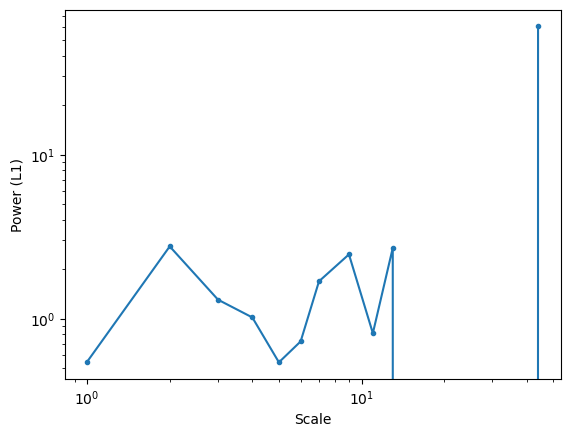

In [6]:
print(transform.shape)
spectrum = np.sum(transform, axis=1)
plt.loglog(scales, spectrum,'.-')
plt.ylabel('Power (L1)')
plt.xlabel('Scale')
# plt.ylim((0,5))

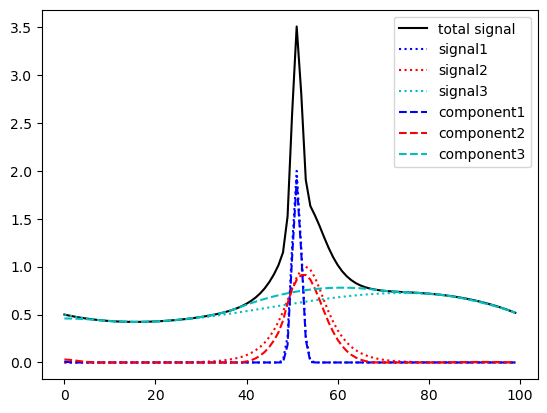

In [7]:
# Transform components
component1 = np.sum(transform[0:3,:], axis=0)
component2 = np.sum(transform[3:15,:], axis=0)
component3 = np.sum(transform[15:,:], axis=0)

# Compare to signal components
plt.plot(t, signal, 'k', label='total signal')
plt.plot(t, signal1, 'b:', label='signal1')
plt.plot(t, signal2, 'r:', label='signal2')
plt.plot(t, signal3, 'c:', label='signal3')

plt.plot(t, component1, 'b--', label='component1')
plt.plot(t, component2, 'r--', label='component2')
plt.plot(t, component3, 'c--', label='component3')

plt.legend();